# Bottlenecks, Hubs, Communities
### Measuring the Structure of a Graph

Graphs come in a multitude of different forms or structures. There are graphs with few connections per node (low average degree, e.g., high-school dating dataset) and those with many connections per node (e.g., social networks).

Moreover, there is a whole range of metrics that can tell us something about the nature of a graph. For instance, the average path length is an indicator of how far apart elements typically are. Networks with many cross-connections and hubs/centers usually have a small average path length (often referred to as "Small World" in some contexts).

The *Clustering Coefficient* indicates how well nodes are interconnected, i.e., how often neighbor nodes are also neighbors of each other ("A friend of a friend is a friend...").

**Average path length**

$$
\langle \ell \rangle = \frac{\sum   _{i,j}\ell_{ij}}{N (N-1)}
$$
					
where $\ell_{ij}$ is the shortest path from $i$ to $j$.

Clustering coefficient:

$$
C(i) = \frac{\tau(i)}{\tau_{max}(i)} = \frac{2\tau(i)}{k_i(k_i-1)}
$$

$$
C= \frac{\sum_{i:k>1}C(i)}{N_{k>1   }}
$$


### How important is a Node?

Often, we are interested in the importance of individual nodes. Which elements are essential for the network? What are potential bottlenecks? Who / What is best connected?

For this, there are a number of measuring methods, two of the most well-known are *closeness centrality* and *betweenness centrality*. The naming of these two terms is not ideal, at least we saw that if often is confusing to students at first. But let's try to understand both measures to learn what we can use them for.

#### Closeness Centrality
The *closeness centrality* measures the average distance from a node to all other nodes. High closeness centrality means a small average distance (since the reciprocal is used in the formula), i.e., the nodes with the highest values are the "central" points of the network. It's fastest to get anywhere from here. 

**Closeness centrality (for nodes)**:

$$
g_i =\frac{N - 1}{\sum  _{i\neq j}\ell_{ij}}
$$

with $\ell_{ij}$ being the shortest path from $i$ to $j$.

It is important to note, that the closeness centrality does not necessarily reflect what we intuitively mean by the "importance" of a node for the rest of the network. If you live in a tiny village that happens to be close to a major traffic hub, such as an international airport, this node (your village) would get a high closeness centrality because many other nodes are within short reach. The really important node, however, is the trafic hub itself an not your village (hope this doesn't hurt any feelings...).

#### Betweenness Centrality
*Betweenness centrality* considers how many of all shortest paths pass through a certain node. Or in other words, how many shortest paths would be eliminated if a certain node were removed. Bottlenecks in the network, for instance, are characterized by high *betweenness centrality*. But also central hubs that facilitate many paths in the network will rank high.

**Betweenness centrality (for nodes)**

$$
b_i = \sum  _{h \neq j \neq i}\frac{\sigma(j, h |i)}{\sigma(j, h)}
$$

With $\sigma(j, h)$ the number of shortest paths from node $j$ to $h$ and $\sigma(j, h |i)$ the number of shortest paths from node $j$ to $h$ that pass through node $i$.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Import networkx
import networkx as nx

In [145]:
# generate a random network
G = nx.powerlaw_cluster_graph(100, 1, 0.5, seed=0)
pos = nx.spring_layout(G, k=0.05, seed=0)

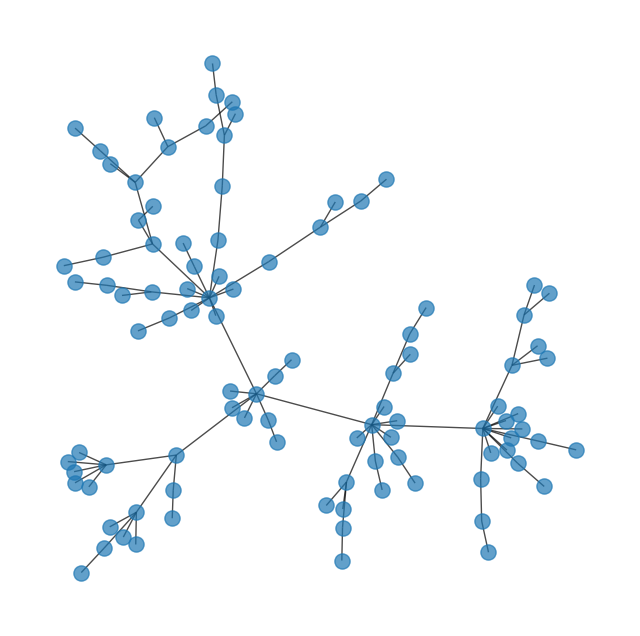

In [146]:
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(G,
        pos=pos,
        node_size=120,
        alpha=0.7,
        ax=ax,
       )

### What are the "most important" nodes?
Graphs often represent complex data containing a lot of information about relationships, flows, routes, etc.
...

We are often interested in measuring the "importance" of nodes. And importance can mean a lot of different things, depending on what my data is and what my precise question and interest is. 

closeness centrality

betweenness centrality

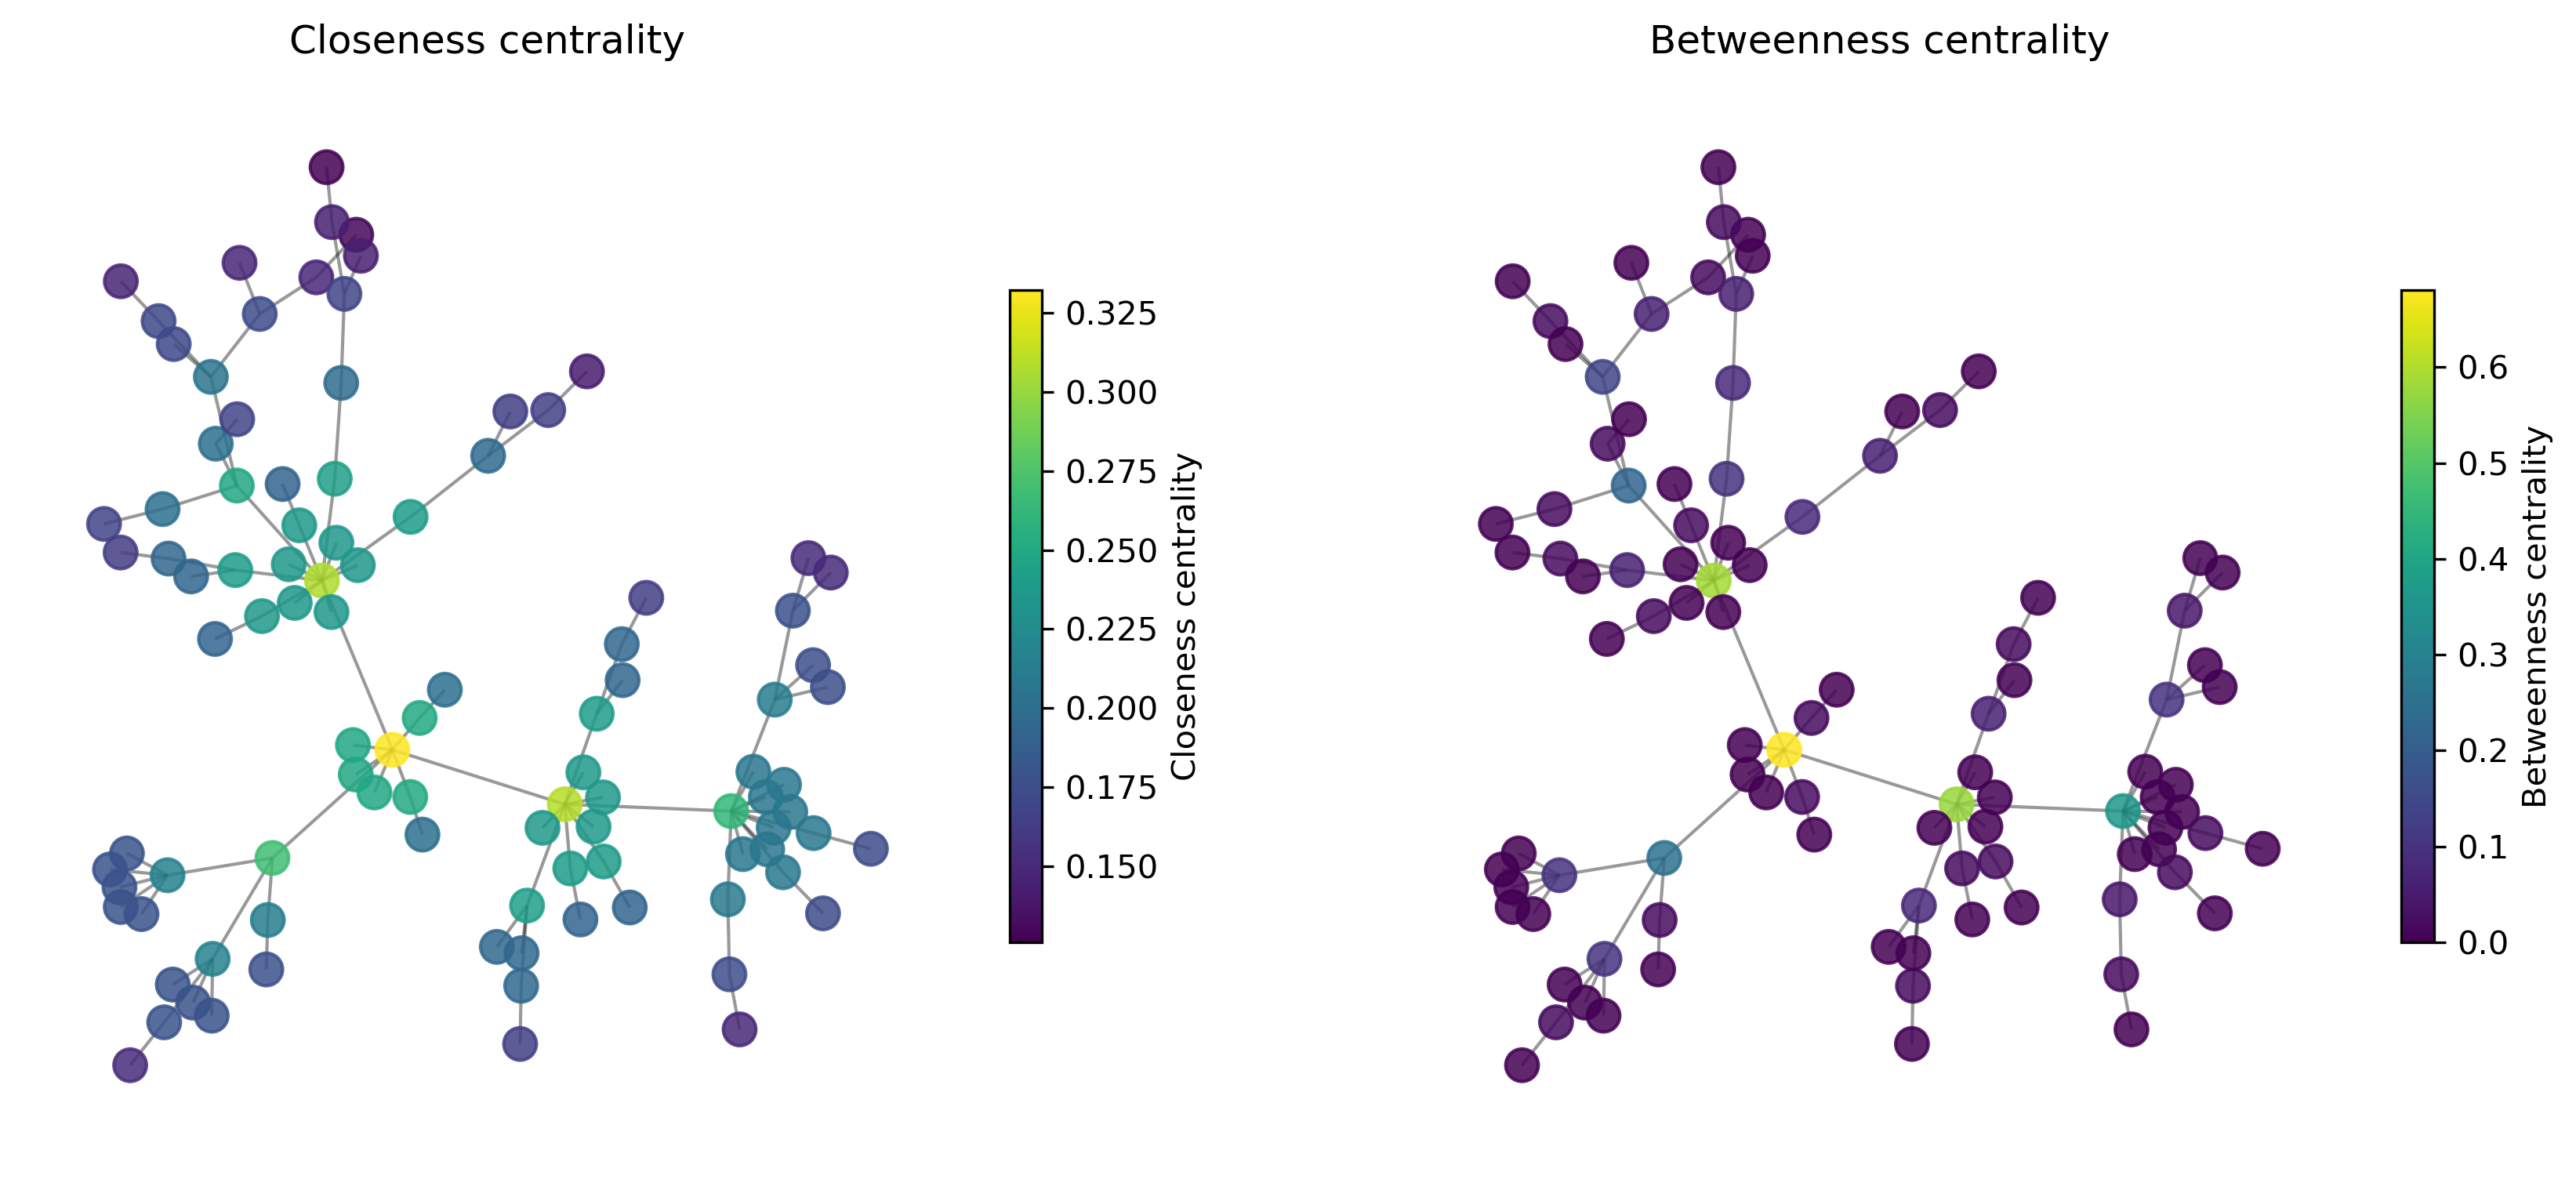

In [148]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

properties1 = dict(nx.closeness_centrality(G))
properties2 = dict(nx.betweenness_centrality(G))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

# 1
nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax1)
nodes1 = nx.draw_networkx_nodes(G, pos, nodelist=list(properties1.keys()),
                                node_size=100,
                                node_color=list(properties1.values()),
                                cmap="viridis",
                                alpha=0.85,
                                ax=ax1,
                                )
ax1.set_title("Closeness centrality")
sm1 = ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min(properties1.values()), vmax=max(properties1.values())))
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1, orientation='vertical', shrink=0.6)
cbar1.set_label("Closeness centrality")

# 2
nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax2)
nodes2 = nx.draw_networkx_nodes(G, pos, nodelist=list(properties2.keys()),
                                node_size=100,
                                node_color=list(properties2.values()),
                                cmap="viridis",
                                alpha=0.85,
                                ax=ax2,
                                )
ax2.set_title("Betweenness centrality")
sm2 = ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min(properties2.values()), vmax=max(properties2.values())))
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2, orientation='vertical', shrink=0.6)
cbar2.set_label("Betweenness centrality")

ax1.axis('off')
ax2.axis("off")
#plt.savefig("fig_graphs_centralities01.svg")
plt.show()

### How important is an edge?
*Betweenness centrality* can be calculated not only for nodes but also for edges. Analog to the case for nodes you can think of this as a question to how often a certain link is used when traversing the graph between two nodes. 

**Betweenness centrality (for edges)**

$$
b_e = \sum_{i, j}\frac{\sigma(i, j |e)}{\sigma(i,j)}
$$

With $\sigma(i, j)$ the number of shortest paths from node $i$ to $j$ and $\sigma(i, j |e)$ the number of shortest paths from node $i$ to $j$ that pass through edge $e$.